### **Myntra Womens fashion dataset**

* **Recommmendation Steps**:
  
  1. Preprocess the feature named p_attributes.

      a. Converted the json string to the dictionary.

      b. Converted the dictionary into the features.

      c. handle the missing values of features of p_attributes.
  
  2. Extracted the important features from the p_attributes.

  3. Created the new features named `tags` and combined all important extracted features
     from the p_attributes.
  
  4. The feature `tags` is of type `string`.

  5. Preproccessed this tags features by removing the `stop-words`, applied the `lematization` technique, and then used `countVectorizer` for the text emmbbedings.

  6. Then calculated the cosine similarity between every feature vectors.

  7. Recommended the items based on similarity matrix.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Reading the CSV file using pandas

df = pd.read_csv('/content/drive/MyDrive/DAIICT-RS/fashion-dataset.csv')
df.head()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


In [4]:
# Set display options to show all rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



---


* **Extracting features from the column named 'p_attributes'**


---



In [5]:
import ast

# Extract features from 'p_attributes'
for index, row in df.iterrows():

    if  not pd.isna(row['p_attributes']):
      # get features into the dictionary format
      features_dict = ast.literal_eval(row['p_attributes'])

      # Add features as separate columns to the DataFrame
      for feature, value in features_dict.items():
          df.at[index, feature] = value

<ipython-input-5-c54565f5121c>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, feature] = value
<ipython-input-5-c54565f5121c>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, feature] = value
<ipython-input-5-c54565f5121c>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [6]:
# Drop the columns named 'p_attributes' and 'Unnamed: 0'

df = df.drop(columns=['p_attributes', 'Unnamed: 0'])

In [7]:
# Shape of the dataset

print(f'Shape: {df.shape}')

Shape: (14330, 115)


In [8]:
df.replace('NA', np.nan, inplace=True)

In [9]:
print(df.isna().sum())

p_id                                                          18
name                                                          18
price                                                         18
colour                                                        21
brand                                                         18
img                                                           18
ratingCount                                                 7749
avg_rating                                                  7749
description                                                   18
Add-Ons                                                    14134
Body Shape ID                                               8044
Body or Garment Size                                        3371
Bottom Closure                                             13170
Bottom Fabric                                              12523
Bottom Pattern                                             11567
Bottom Type              

In [10]:
df.fillna('', inplace=True)

In [11]:
df.isna().sum()

p_id                                                       0
name                                                       0
price                                                      0
colour                                                     0
brand                                                      0
img                                                        0
ratingCount                                                0
avg_rating                                                 0
description                                                0
Add-Ons                                                    0
Body Shape ID                                              0
Body or Garment Size                                       0
Bottom Closure                                             0
Bottom Fabric                                              0
Bottom Pattern                                             0
Bottom Type                                                0
Character               

In [12]:
df.shape

(14330, 115)

In [13]:
df.columns.values

array(['p_id', 'name', 'price', 'colour', 'brand', 'img', 'ratingCount',
       'avg_rating', 'description', 'Add-Ons', 'Body Shape ID',
       'Body or Garment Size', 'Bottom Closure', 'Bottom Fabric',
       'Bottom Pattern', 'Bottom Type', 'Character', 'Dupatta',
       'Dupatta Border', 'Dupatta Fabric', 'Dupatta Pattern',
       'Main Trend', 'Neck', 'Number of Pockets', 'Occasion',
       'Ornamentation', 'Pattern Coverage', 'Print or Pattern Type',
       'Sleeve Length', 'Sleeve Styling', 'Slit Detail', 'Stitch',
       'Sustainable', 'Technique', 'Top Design Styling', 'Top Fabric',
       'Top Hemline', 'Top Length', 'Top Pattern', 'Top Shape',
       'Top Type', 'Waistband', 'Wash Care', 'Weave Pattern',
       'Weave Type', 'Style Tip', 'Colour Family', 'Design Styling',
       'Fabric', 'Fabric 2', 'Fabric Purity', 'Hemline', 'Length',
       'Pattern', 'Shape', 'Care for me', 'Where-to-wear', 'Wedding',
       'About the Brand', 'Better Cotton Initiative', 'Center Front Op

In [14]:
# all columns in dataframe
columns = df.columns

# get all columns uniques values
for col in columns:
  print(col, " ===>>", df[col].unique())

p_id  ===>> [17048614.0 16524740.0 16331376.0 ... 16382150.0 16379664.0 16379656.0]
name  ===>> ['Khushal K Women Black Ethnic Motifs Printed Kurta with Palazzos & With Dupatta'
 'InWeave Women Orange Solid Kurta with Palazzos & Floral Print Dupatta'
 'Anubhutee Women Navy Blue Ethnic Motifs Embroidered Thread Work Kurta with Trousers & With Dupatta'
 ... 'Vero Moda Women Pink Sweatshirt' 'Vero Moda Women Blue Sweatshirt'
 'Vero Moda Women Grey & Green Colourblocked Sweatshirt']
price  ===>> [5099.0 5899.0 4899.0 ... 2919.0 2080.0 1360.0]
colour  ===>> ['Black' 'Orange' 'Navy Blue' 'Red' 'Beige' 'Yellow' 'Green' 'Pink'
 'Mustard' 'Teal' 'Peach' 'Maroon' 'Blue' 'Sea Green' 'Lime Green'
 'Burgundy' 'Fluorescent Green' 'Lavender' 'Magenta' 'Purple' 'White'
 'Off White' 'Charcoal' 'Cream' 'Copper' 'Multi' 'Mauve' 'Grey' 'Brown'
 'Turquoise Blue' 'Rust' 'Violet' 'Assorted' '' 'Fuchsia' 'Olive' 'Coral'
 'Grey Melange' 'Rose' 'Gold' 'Khaki' 'Tan' 'Coffee Brown' 'Silver' 'Nude'
 'Camel Brown' 

In [15]:
features_to_remove = ['Number of Pockets', 'Body Shape ID', 'Collection Name', 'Center Front Open', 'Care for me', 'Multipack Set', 'Contact Brand or Retailer for pre-sales product queries', 'Reversible', 'How to care for your denim', 'What it does for your body', 'Fusion Wear', 'Regions', 'Technology Present']

df.drop(columns=features_to_remove, inplace=True)

In [16]:
# shape of dataset after dropping features

df.shape

(14330, 102)

In [17]:
import re

def preprocess_string(input_string):
    # Convert to lowercase
    result_string = input_string.lower()

    # Remove spaces
    result_string = result_string.replace(" ", "")

    # Remove symbols and special characters
    result_string = re.sub(r'[^a-zA-Z0-9]', '', result_string)

    return result_string

In [18]:
df.columns

Index(['p_id', 'name', 'price', 'colour', 'brand', 'img', 'ratingCount',
       'avg_rating', 'description', 'Add-Ons',
       ...
       'Lehenga Closure', 'Lehenga Fabric', 'Lehenga Lining Fabric',
       'Lehenga Stitch', 'Pattern Size', 'Collar', 'Lining Fabric',
       'Front Styling', 'Hood', 'Pocket'],
      dtype='object', length=102)

In [19]:
new_cols = df.columns

for col in new_cols:
  if col not in ['p_id', 'name', 'price', 'colour', 'brand', 'img', 'ratingCount','avg_rating', 'description']:
    df[col] = df[col].apply(preprocess_string)

In [20]:
cols = new_cols.drop(labels=['p_id', 'name', 'price', 'colour', 'brand', 'img', 'ratingCount','avg_rating', 'description'])

df['tags'] = df[cols].apply(lambda row: ' '.join(row.astype(str)), axis=1).apply(lambda r: r.strip().split()).apply(lambda r: ' '.join(r))

In [21]:
new_df = df[['p_id', 'name', 'brand', 'img', 'tags']]

In [22]:
new_df.head()

,p_id,name,brand,img,tags
0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,Khushal K,http://assets.myntassets.com/assets/images/170...,garmentmeasurementsin slipon viscoserayon prin...
1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,InWeave,http://assets.myntassets.com/assets/images/165...,garmentmeasurementsin zip viscoserayon solid p...
2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,Anubhutee,http://assets.myntassets.com/assets/images/163...,garmentmeasurementsin slipon viscoserayon prin...
3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,Nayo,http://assets.myntassets.com/assets/images/147...,garmentmeasurementsin slipon purecotton printe...
4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,AHIKA,http://assets.myntassets.com/assets/images/110...,garmentmeasurementsin roundneck daily ethnicmo...


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

new_df['tags'] = new_df['tags'].apply(lemmatize_text)

<ipython-input-24-7b908e1094b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lemmatize_text)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(new_df['tags'])

# Converting the sparse matrix to a dense array
dense_array = X.toarray()

print(dense_array.shape)

(14330, 1390)




---


* **So the after applying the count vectorizer the maximum unique features are 1390.**


---



In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(X, dense_output=True)

# Print the shape of the similarity matrix
print("Shape of the similarity matrix:", similarity_matrix.shape)

Shape of the similarity matrix: (14330, 14330)


In [27]:
similarity_matrix

array([[1.        , 0.726372  , 0.63900965, ..., 0.30618622, 0.31506302,
        0.24504901],
       [0.726372  , 1.        , 0.57869139, ..., 0.43133109, 0.44383603,
        0.22191802],
       [0.63900965, 0.57869139, 1.        , ..., 0.2236068 , 0.26843775,
        0.26843775],
       ...,
       [0.30618622, 0.43133109, 0.2236068 , ..., 1.        , 0.85749293,
        0.62882815],
       [0.31506302, 0.44383603, 0.26843775, ..., 0.85749293, 1.        ,
        0.76470588],
       [0.24504901, 0.22191802, 0.26843775, ..., 0.62882815, 0.76470588,
        1.        ]])

In [45]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def display_image(url):
  # display the image
  response = requests.get(url)

  # Check if the request was successful (status code 200)
  if response.status_code == 200:
      # Open the image using PIL
      image = Image.open(BytesIO(response.content))

      # Resize the image
      image = image.resize((300, 400))

      # Display the image
      display(image)
  else:
      print("Failed to fetch the image")

def recommed(fashion_item):
  fashion_item_index = new_df[new_df['name'] == fashion_item].index[0]
  distances = similarity_matrix[fashion_item_index]

  similiar_fashion_items_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

  for i in similiar_fashion_items_list:
    print("Item Name: ", new_df.iloc[i[0]]['name'])
    display_image(new_df.iloc[i[0]]['img'])

    print("-----------------------------------------------------------------------------------------------")

In [52]:
new_df[new_df['p_id'] == 17819832].index

Int64Index([1002], dtype='int64')

Get the recommendation of below image:


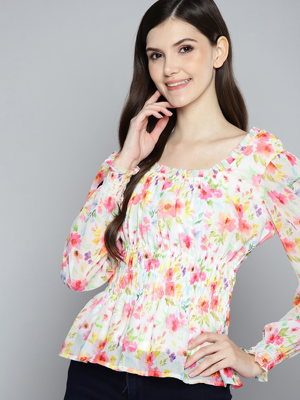

In [53]:
target = new_df.iloc[1002]['name']
url = new_df.iloc[1002]['img']

print("Get the recommendation of below image:")
display_image(url)

Item Name:  Mast & Harbour Green & Orange Floral Print Regular Top


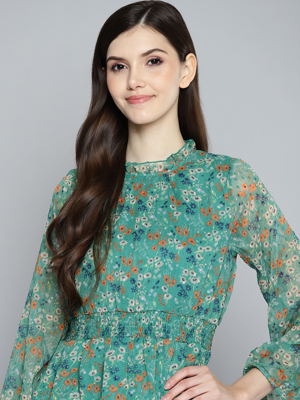

-----------------------------------------------------------------------------------------------
Item Name:  Mast & Harbour Blue & Coral Red Floral Printed Puff Sleeves Top


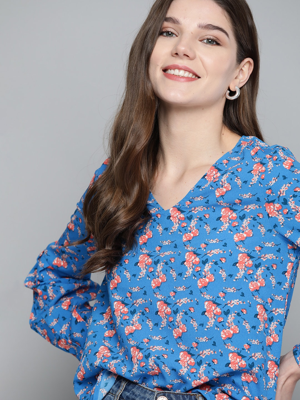

-----------------------------------------------------------------------------------------------
Item Name:  Athena Black Floral Printed Puff Sleeves Smocked Georgette Regular Crop Top


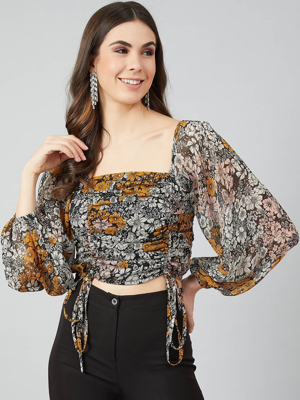

-----------------------------------------------------------------------------------------------
Item Name:  20Dresses Pink & White Floral Print Crop Top


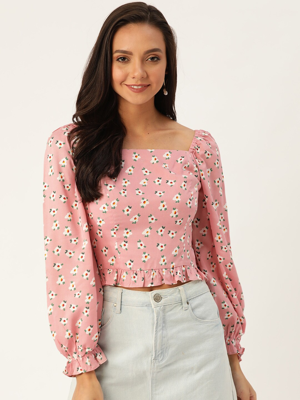

-----------------------------------------------------------------------------------------------
Item Name:  FabAlley Brown Floral Print Tie-Up Neck Georgette Top


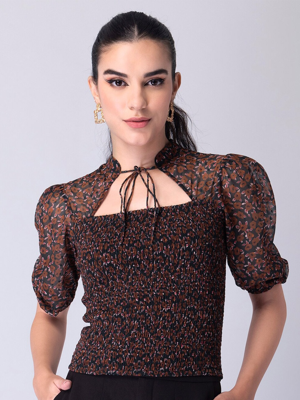

-----------------------------------------------------------------------------------------------


In [54]:
recommed(target)